Credit card fraud detection
1. Import libraries


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

2. Data preview

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


4.Data Cleaning

In [ ]:
df.duplicated().any()

True

There are duplicate values in data so we need to clean this by removing the multiple occurrence of same data as below

In [ ]:

df_no_duplicates = df.drop_duplicates()

df_no_duplicates.reset_index(drop=True, inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().any()

False

There are no duplicate values present in data set so we dont need to remove any duplicate row

5 . EDA and Visualization

Plotting Value Counts of 'Class' Column

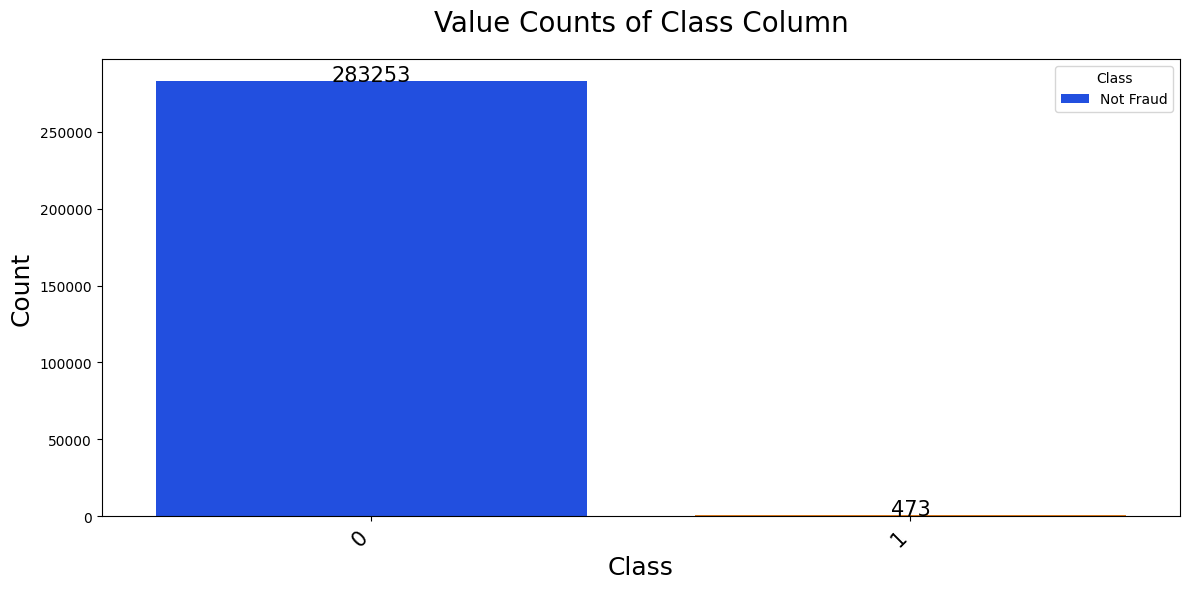

In [ ]:
def plot_value_counts(df, column):
    # Set the size of the plot
    plt.figure(figsize=(12, 6))

    # Use Seaborn's countplot to visualize the value counts of the specified column
    sns.countplot(x=column, data=df, palette="bright")

    # Add title and axis labels
    plt.title(f"Value Counts of {column} Column", fontsize=20, pad=20)
    plt.xlabel(column, fontsize=18)
    plt.ylabel("Count", fontsize=18)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right", fontsize=15)

    # Add data labels above each bar
    for p in plt.gca().patches:
        plt.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="baseline",
            fontsize=15,
        )

    # Add a legend with Class labels
    plt.legend(title="Class", labels=["Not Fraud", "Fraud"])

    # Adjust layout for better appearance
    plt.tight_layout()

    # Display the plot
    plt.show()


plot_value_counts(df, "Class")

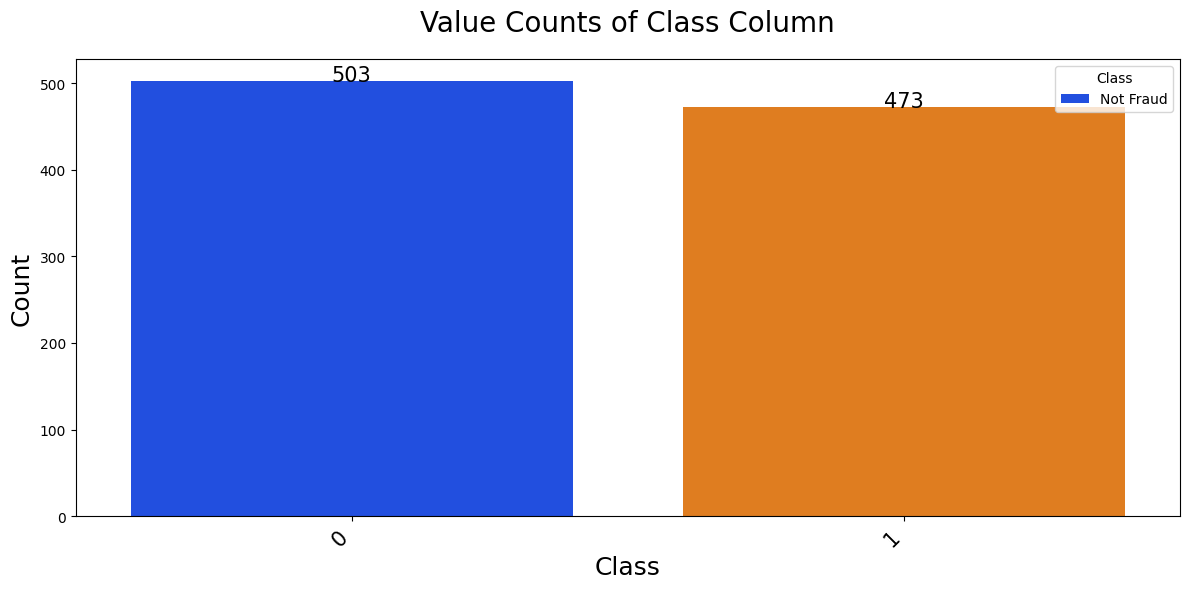

In [ ]:

class_0_samples = df[df["Class"] == 0].sample(n=1000, random_state=42)


Q1 = class_0_samples.quantile(0.25)
Q3 = class_0_samples.quantile(0.75)
IQR = Q3 - Q1

class_0_samples = class_0_samples[
    ~((class_0_samples < (Q1 - 1.43 * IQR)) | (class_0_samples > (Q3 + 1.5 * IQR))).any(
        axis=1
    )
]

class_1_samples = df[df["Class"] == 1]
df_resampled = pd.concat([class_0_samples, class_1_samples])

plot_value_counts(df_resampled, "Class")

Correlation

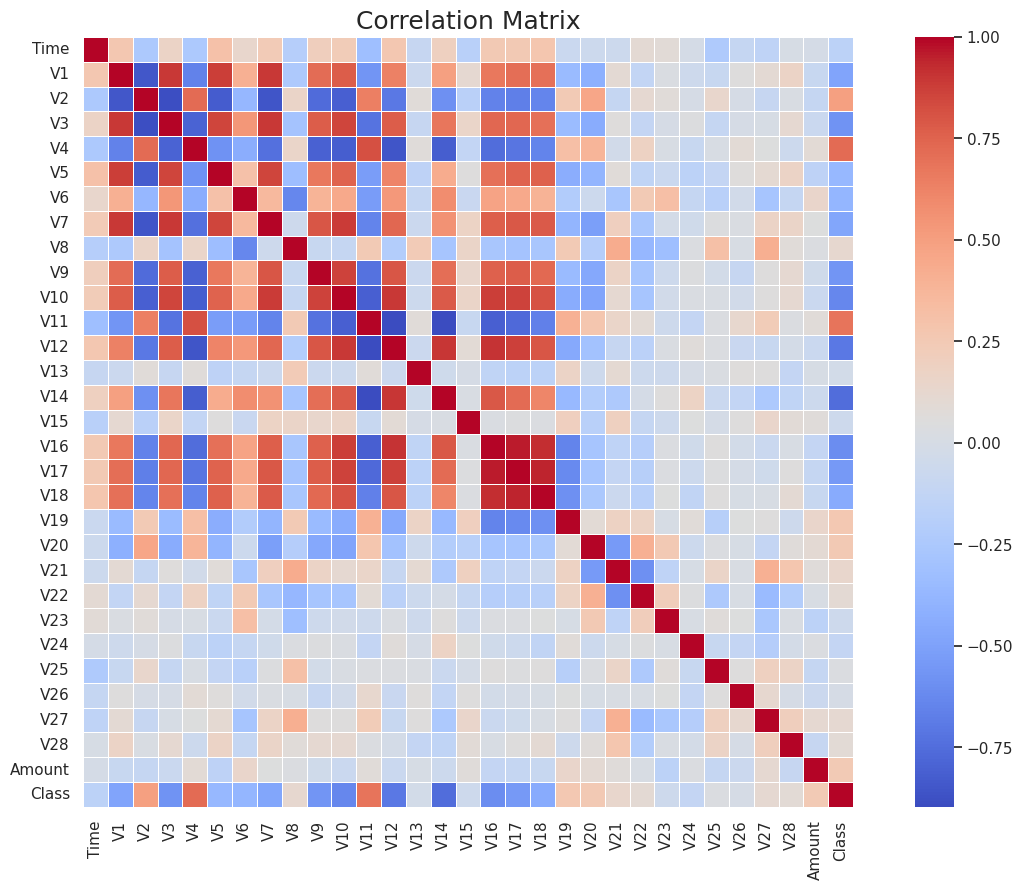

In [ ]:

sns.set(style="white")
plt.figure(figsize=(16, 10))

corr_matrix = df_resampled.corr()


sns.heatmap(
    corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, square=True
)

plt.title("Correlation Matrix", fontsize=18)


plt.show()

Observation

1)the most significant strong positive correlations are between V16 - V17 - V18 and between V9 - V10

2)the most significant strong negetive correlations are between V4 - V14 // V4 - V12 // V4 - V10 // V10 - V11 // V11 - V14 // V11 - V12 // V21 - V22

3) there is clear lack of h-positive correlations in the range of V19 to V28

4)there are several moderate to semi-strong positive/negetive correlations in the range of V1 to V18

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times.

Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

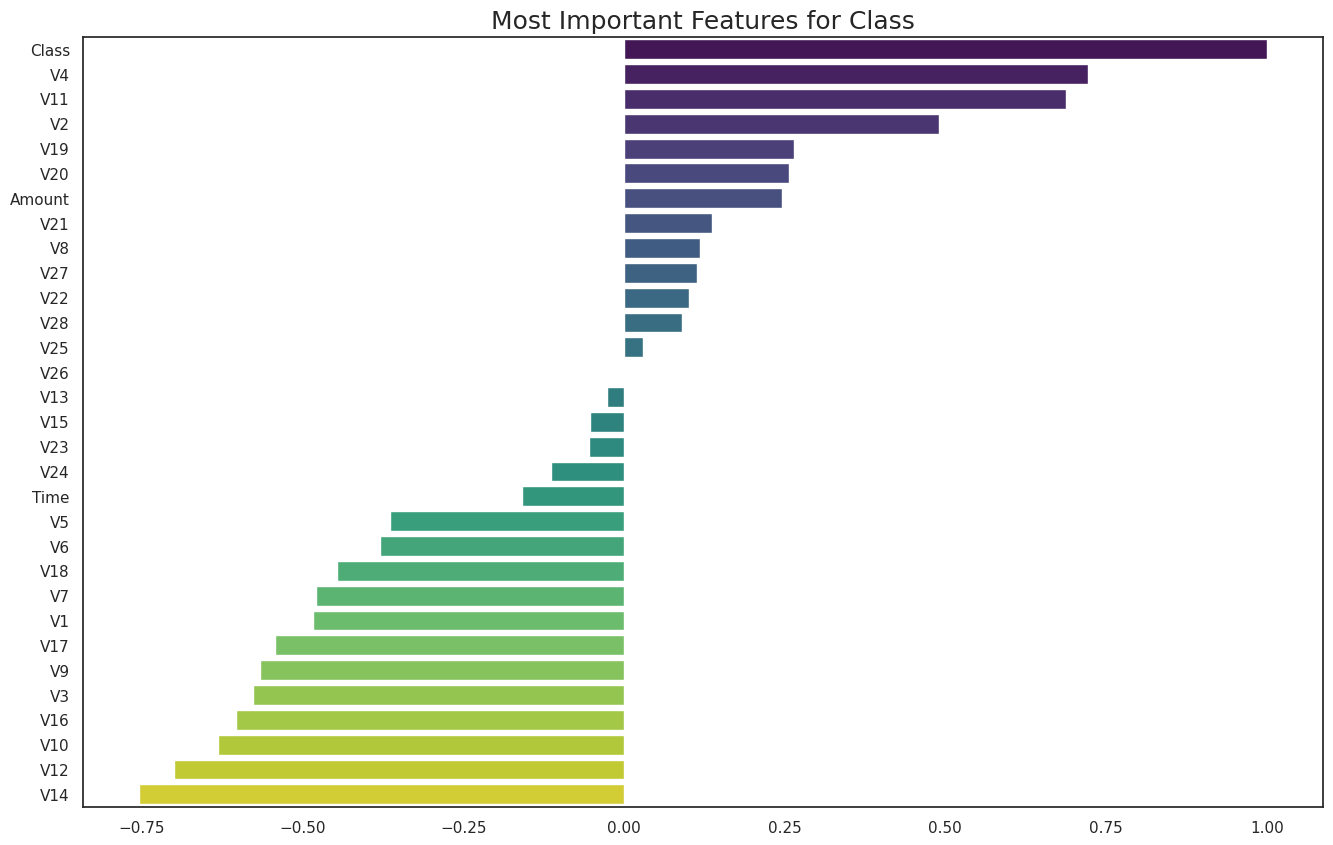

In [ ]:
# Set the style for the plot
sns.set(style="white")
plt.figure(figsize=(16, 10))

# Calculate correlation matrix
corr_matrix = df_resampled.corr()

# Choose your target variable (assuming 'target_variable' is your target variable)
target_variable = "Class"

# Extract correlations with the target variable
correlations = corr_matrix[target_variable].sort_values(ascending=False)

# Create a bar plot for the most important features
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")

# Set plot title
plt.title(f"Most Important Features for {target_variable}", fontsize=18)

# Display the plot
plt.show()


In [ ]:
print(df_resampled.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
import numpy as np

df_resampled['Hour'] = df_resampled['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df_resampled.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_data= pd.DataFrame(tmp)
df_data.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_data.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,1.00,121.49,9,335.87,37.318889,7.810,2613.051186
1,0.0,1,0.00,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,1,59.00,239.93,2,298.93,149.465000,149.465,16367.832450
3,2.0,0,29.91,29.91,1,29.91,29.910000,29.910,NaN
4,2.0,1,1.00,1809.68,21,1829.78,87.132381,1.000,155776.441219


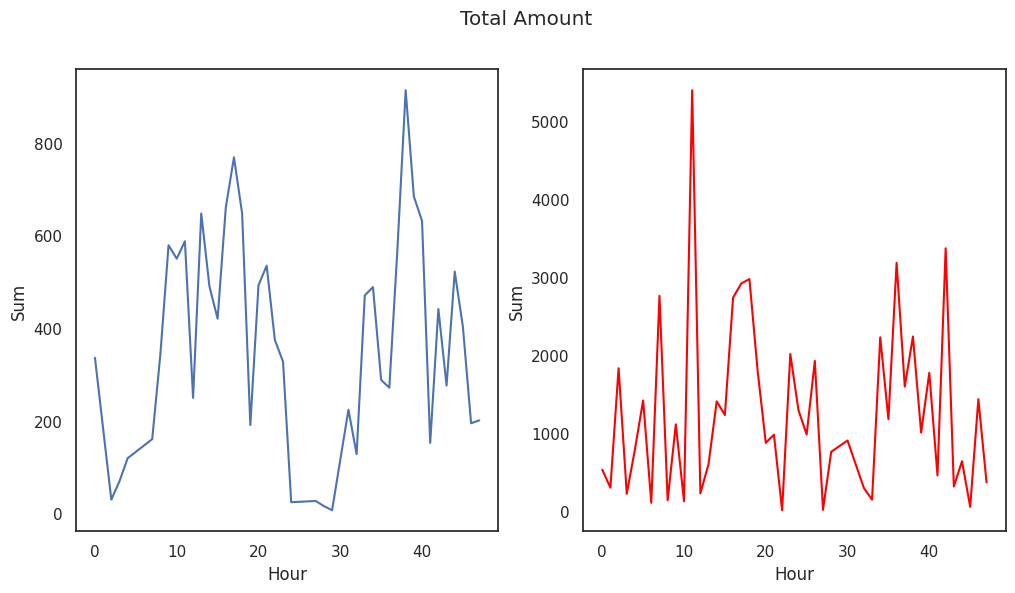

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df_data.loc[df_data.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df_data.loc[df_data.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

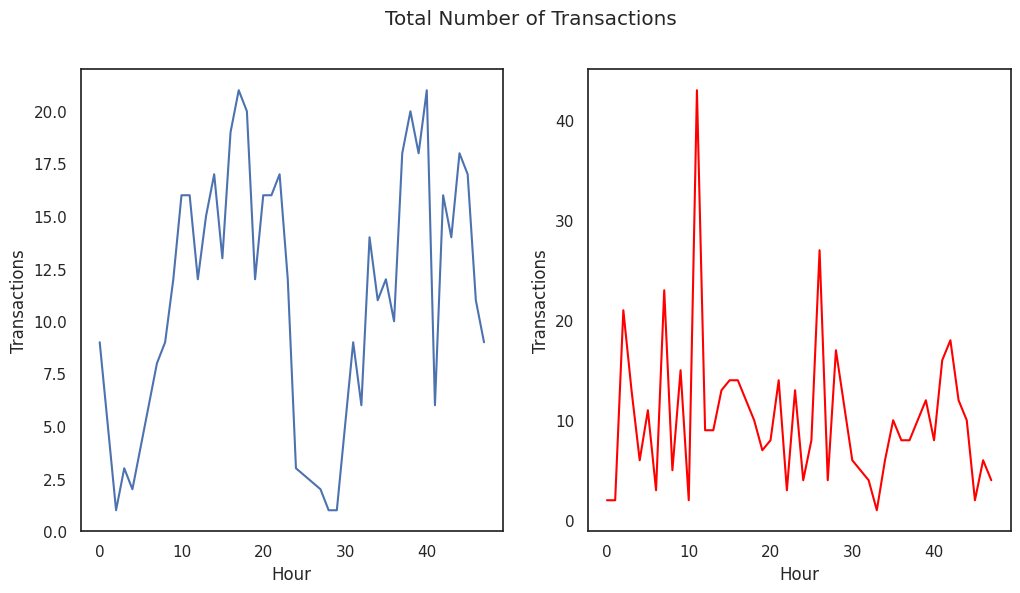

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df_data.loc[df_data.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df_data.loc[df_data.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

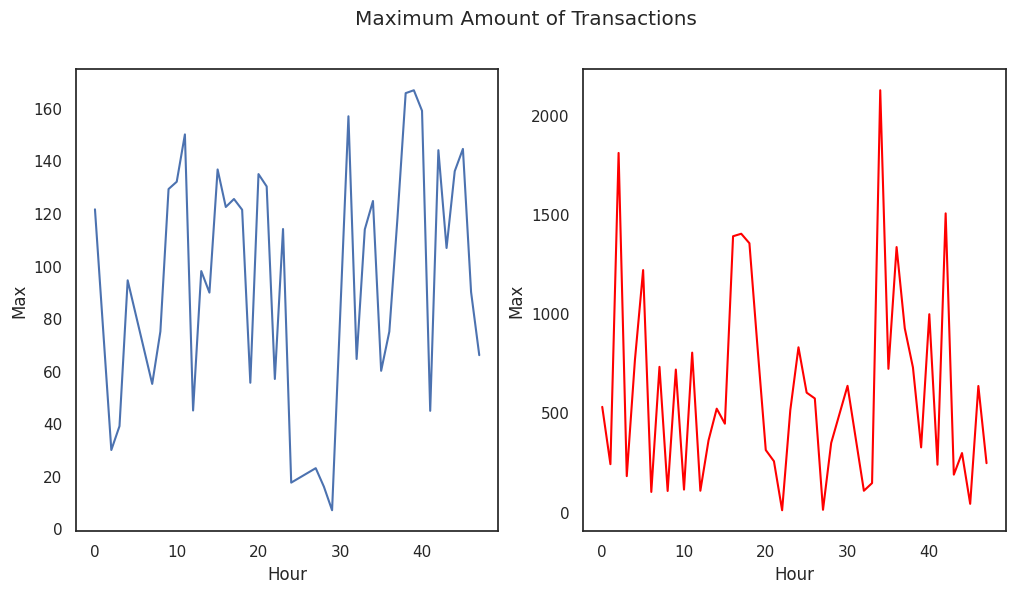

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df_data.loc[df_data.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df_data.loc[df_data.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

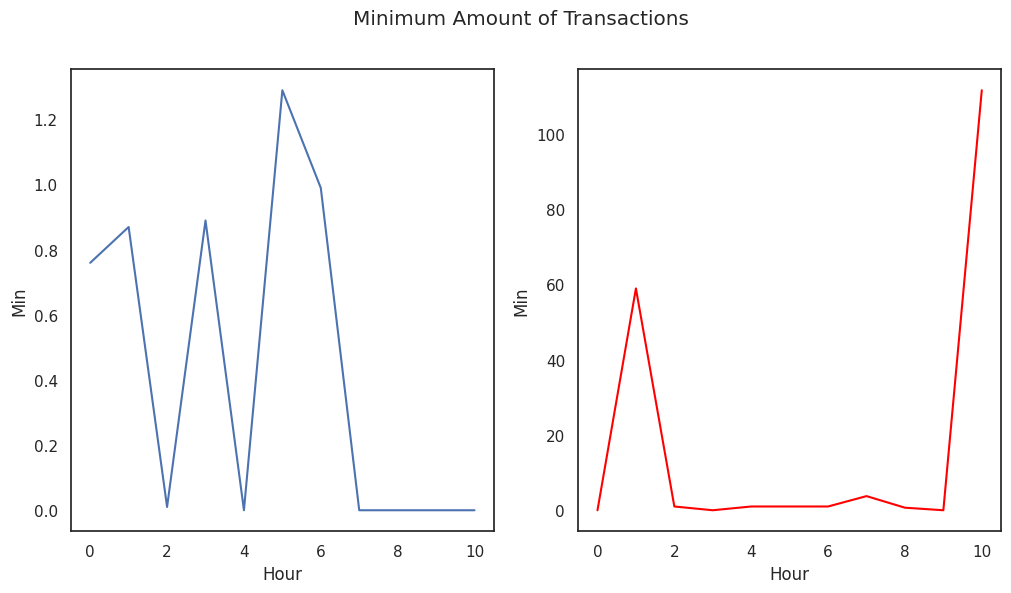

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df_data.loc[df_data.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df_data.loc[df_data.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fraud = df_resampled.loc[df_resampled['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True),
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

In [ ]:
correlations

Class     1.000000
V4        0.794725
V11       0.760645
V2        0.731754
V20       0.577783
V27       0.538876
V8        0.490704
V21       0.434171
Amount    0.216450
V19       0.206888
V28       0.124556
V26       0.087713
V25       0.082747
V13       0.015849
Time     -0.069827
V15      -0.073782
V23      -0.118203
V22      -0.133532
V24      -0.196256
V5       -0.556240
V1       -0.614507
V18      -0.642018
V6       -0.654567
V9       -0.661256
V7       -0.693583
V3       -0.746311
V17      -0.760182
V16      -0.769147
V12      -0.806966
V10      -0.811187
V14      -0.856347
Name: Class, dtype: float64

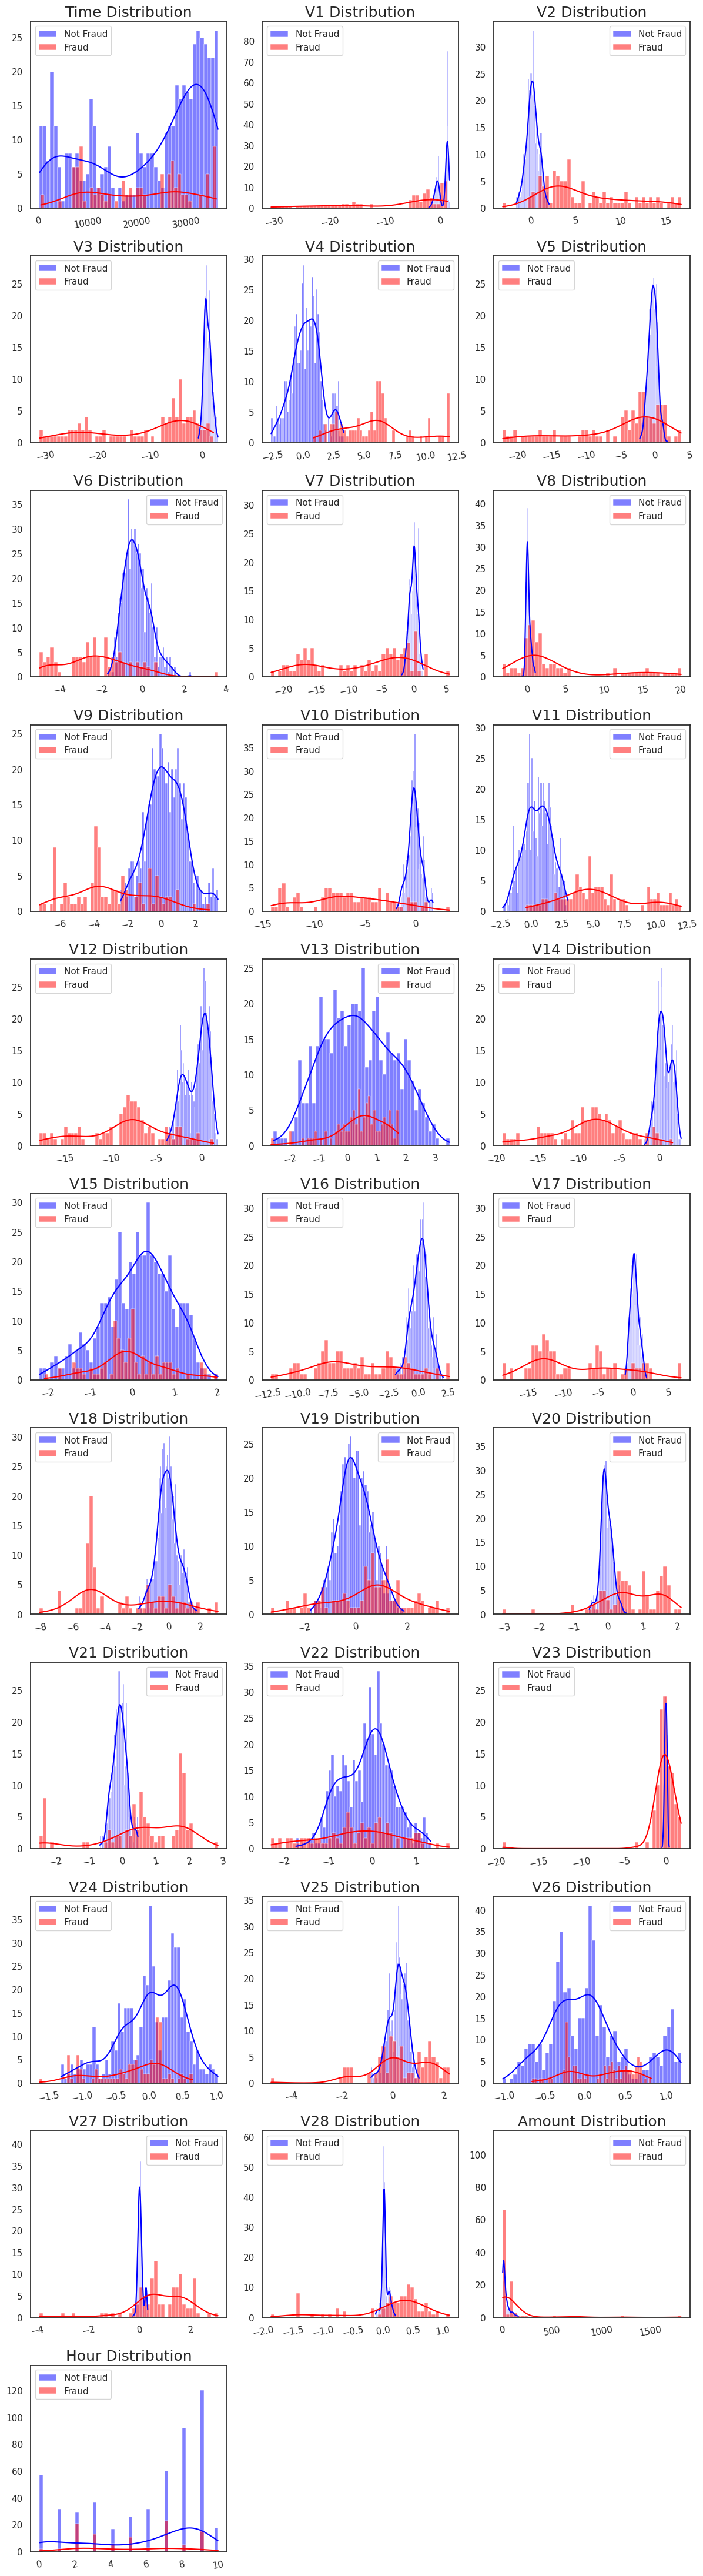

In [ ]:
# Creating a function to plot the distribution of features based on the target variable "Class"

columns_features = [column for column in df_resampled.columns if column != "Class"]


def plot_distribution(df, columns, n_cols, hue):
    # Calculating the number of rows required based on the number of columns and specified number of columns per row
    n_rows = (len(columns) - 1) // n_cols + 1

    # Creating subplots with a specified number of rows and columns
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    ax = ax.flatten()

    # Looping through each feature column and plotting the distribution for "Not Fraud" and "Fraud" classes
    for i, column in enumerate(columns):
        sns.histplot(
            df[column][df["Class"] == 0],
            bins=50,
            color="blue",
            label="Not Fraud",
            kde=True,
            ax=ax[i],
        )
        sns.histplot(
            df[column][df["Class"] == 1],
            bins=50,
            color="red",
            label="Fraud",
            kde=True,
            ax=ax[i],
        )

        # Setting titles, labels, and tick parameters for each subplot
        ax[i].set_title(f"{column} Distribution", fontsize=18)
        ax[i].set_xlabel(None, fontsize=16)
        ax[i].set_ylabel(None, fontsize=16)
        ax[i].tick_params(axis="x", rotation=10)
        ax[i].legend()

    # Ensuring consistent y-axis scaling for all subplots
    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)

    # Removing empty subplots if there are fewer features than the total number of subplots
    for i in range(len(columns), len(ax)):
        ax[i].axis("off")

    # Adjusting layout for better appearance
    plt.tight_layout()

    # Displaying the plot
    plt.show()


# Example usage
plot_distribution(df_resampled, columns_features, 3, "Class")

Standard Scaling with sklearn StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

Feature Selection and Scaling

In [ ]:

X = df_resampled[
    [
        "V14",
        "V4",
        "V10",
        "V12",
        "V17",
        "V3",
        "V11",
        "V2",
        "V16",
        "V7",
        "V21",
        "Amount",
        "V1",
        "V20",
        "V8",
        "V27",
        "V19",
    ]
]

y = df_resampled["Class"]


X["Amount"] = std_scaler.fit_transform(X["Amount"].values.reshape(-1, 1))

X

,V14,V4,V10,V12,V17,V3,V11,V2,V16,V7,V21,Amount,V1,V20,V8,V27,V19
830,-0.163161,-1.811959,0.026261,-1.353207,0.059742,1.957792,-0.555067,0.310544,1.412470,0.295238,-0.091491,-0.088726,-0.741691,0.216057,-0.002608,0.255475,0.096389
7890,1.962251,0.270591,-0.310514,-2.355841,0.197379,0.948094,2.283552,-0.145487,0.690097,-0.630362,-0.017564,-0.213756,1.188294,-0.165887,0.011488,-0.102179,-0.180957
25480,0.511769,-0.000668,-0.121465,-1.093509,0.424363,1.138027,-0.316223,0.495953,-0.735777,1.043052,0.024657,0.266862,-0.196574,0.170870,-0.263800,-0.132554,0.856437
21353,0.333224,0.822811,-0.020369,0.745360,-0.089985,0.572462,1.063427,-0.184572,-0.097005,-0.117361,-0.148188,0.150603,1.080841,-0.076665,0.035933,-0.040917,0.421511
14525,-0.127443,-2.582858,1.001978,-1.450205,0.119105,1.797239,0.584799,-0.827888,0.090519,-0.723346,0.072099,0.150603,-0.743325,-0.474468,0.284096,0.009075,-0.903115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30398,-8.051049,5.505672,-6.546242,-8.042285,-14.329626,-3.628202,3.538202,4.140867,-7.395957,-6.652031,1.582556,-0.277391,-3.519030,0.898723,2.634524,0.900925,2.463843
30442,-7.628652,5.547453,-6.600461,-7.888978,-14.064624,-4.454027,3.367846,4.518355,-7.533404,-6.805053,1.691042,-0.320031,-3.896583,0.757287,2.928356,0.635789,2.525785
30473,-7.687803,4.455230,-7.524368,-7.099825,-13.277300,-5.118363,2.954344,4.382897,-8.520850,-7.281328,1.550473,-0.227659,-4.194074,0.579098,3.332250,0.473934,3.623332
30496,-8.604759,5.252842,-7.833556,-7.781448,-12.624394,-6.730396,3.657350,5.649439,-6.553973,-6.311699,1.194888,0.679647,-4.844372,0.284555,3.449167,0.210214,1.645414


Train-Test Split of Scaled Features and Target Variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

Evaluation Function for Classification Models

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
)



def evaluate(model, conf_matrix=True, return_=False):

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[0, 0]
    tn = cm[1, 1]
    fp = cm[0, 1]
    fn = cm[1, 0]

    if conf_matrix:
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"],
        )
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")

    model_name = str(type(model).__name__)

    if return_:
        metrics_dict = {
            "Model": model_name,
            "accuracy": round(accuracy, 3),
            "precision": round(precision, 3),
            "recall": round(recall, 3),
            "f1": round(f1, 3),
            "roc_auc": round(roc_auc, 3),
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn,
        }
        return metrics_dict

Logistic Regression Model

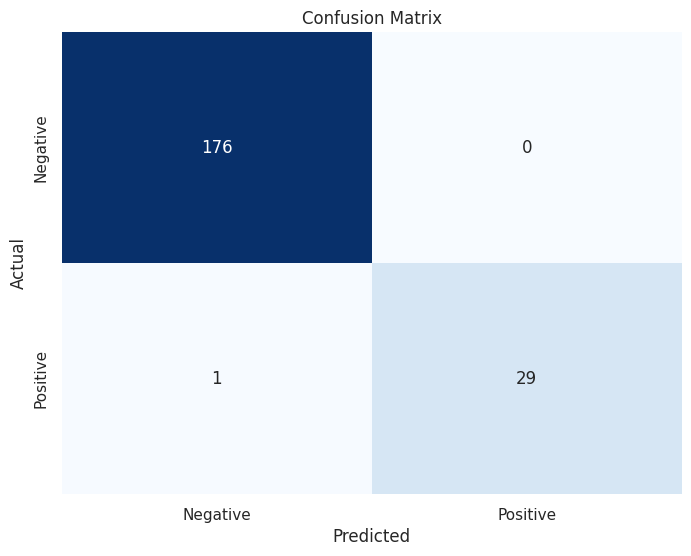

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       176
         1.0       1.00      0.97      0.98        30

    accuracy                           1.00       206
   macro avg       1.00      0.98      0.99       206
weighted avg       1.00      1.00      1.00       206

Accuracy: 0.995
Precision: 1.000
Recall: 0.967
F1-Score: 0.983
ROC-AUC: 0.983


In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression(random_state=42)

Logistic_Regression.fit(X_train, y_train)

evaluate(Logistic_Regression)


Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree = DecisionTreeClassifier(random_state=42)

Decision_Tree.fit(X_train, y_train)

evaluate(Decision_Tree)

NameError: ignored

Random Forest Classifier Model

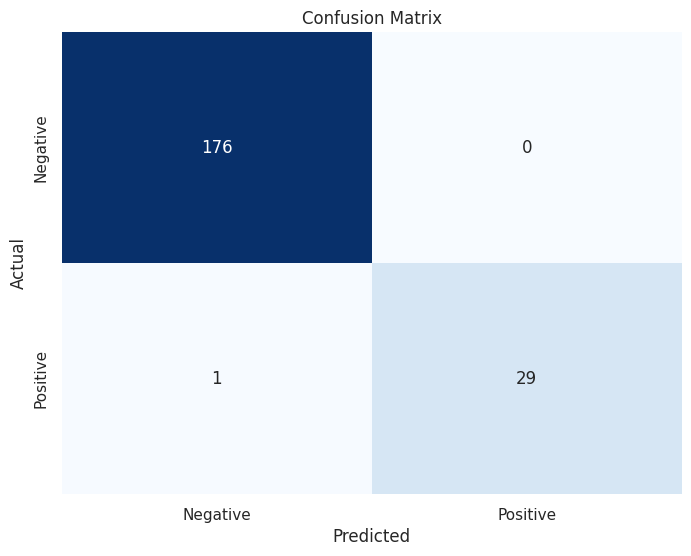

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       176
         1.0       1.00      0.97      0.98        30

    accuracy                           1.00       206
   macro avg       1.00      0.98      0.99       206
weighted avg       1.00      1.00      1.00       206

Accuracy: 0.995
Precision: 1.000
Recall: 0.967
F1-Score: 0.983
ROC-AUC: 0.983


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(
    n_estimators=90, random_state=42, criterion="entropy"
)


Random_Forest.fit(X_train, y_train)


evaluate(Random_Forest)

In [ ]:

classifiers = [
    Logistic_Regression,
    Decision_Tree,
    Random_Forest
]

dfs = []


for classifier in classifiers:
    # Calculate metrics for the current classifier
    metrics_result = evaluate(classifier, return_=True, conf_matrix=False)

    # Create a DataFrame from the dictionary
    metrics_df = pd.DataFrame([metrics_result])

    # Append the DataFrame to the list
    dfs.append(metrics_df)

results_df = pd.concat(dfs, ignore_index=True)
results_df

NameError: ignored

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset to understand its structure
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(None,
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Splitting the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

# Using a RandomForestClassifier for demonstration purposes
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

precision, recall, roc_auc


ValueError: ignored

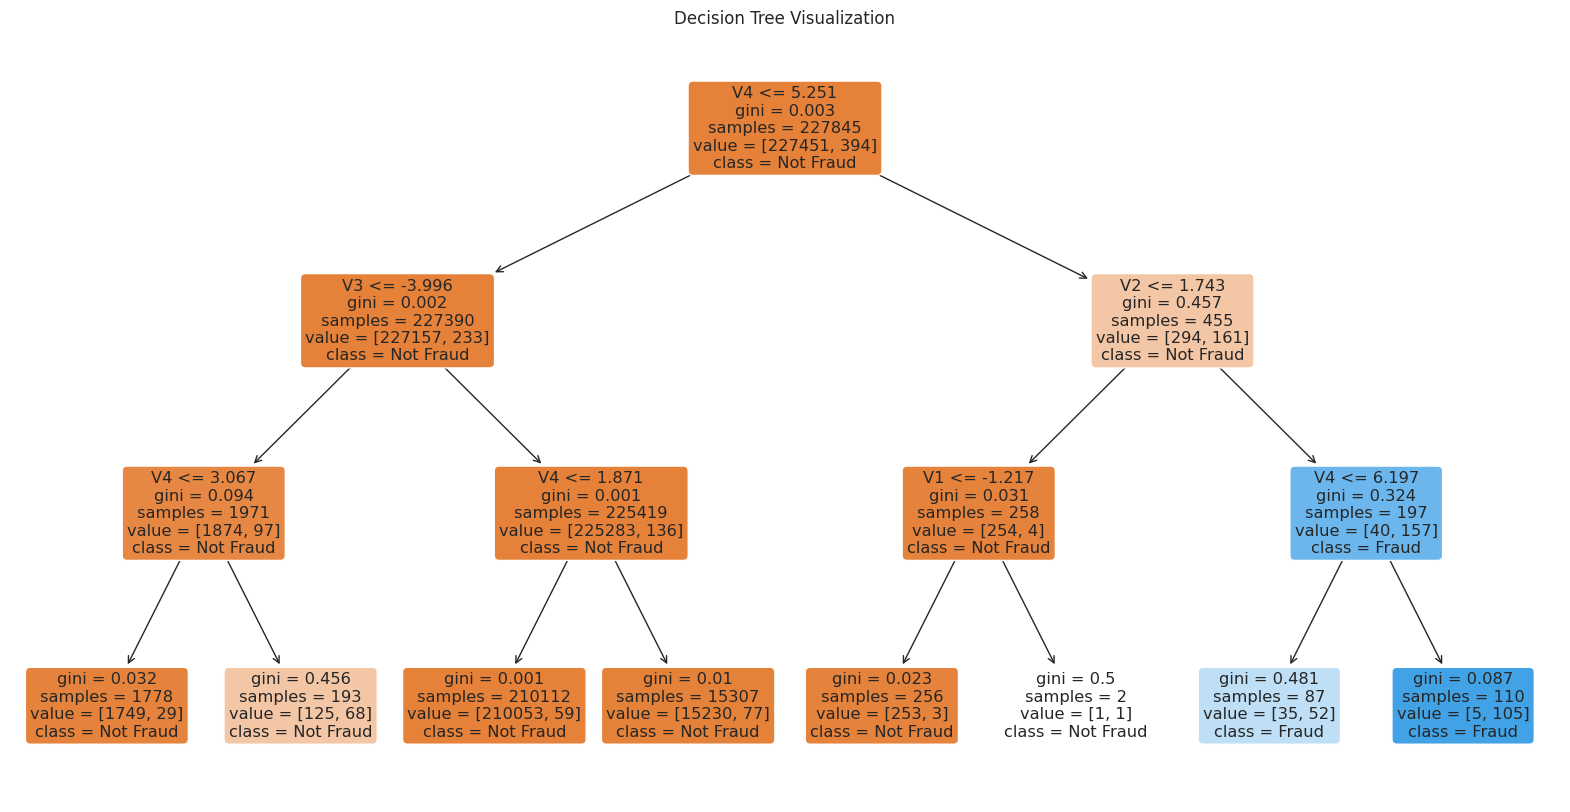

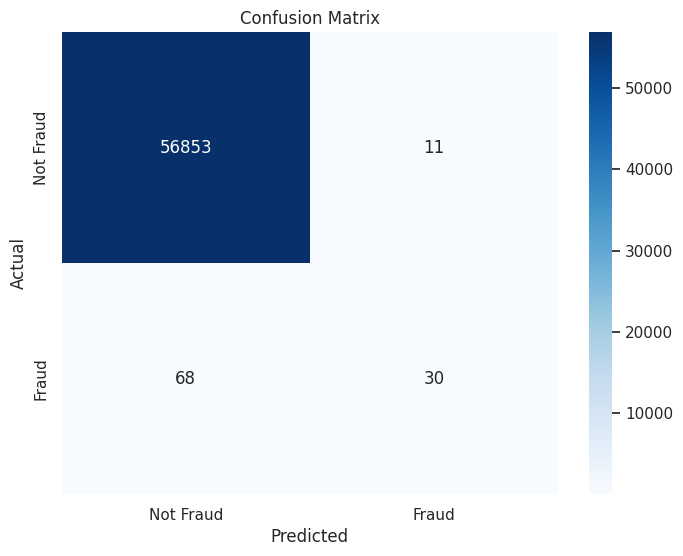

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For the purpose of this demonstration, I will create a simplified decision tree model
# and use it to generate a decision tree visualization and a confusion matrix.

# Simplifying the dataset by selecting a subset of features
X_simplified = X[['V1', 'V2', 'V3', 'V4', 'V5']]
X_train_simplified, X_test_simplified, y_train, y_test = train_test_split(X_simplified, y, test_size=0.2, random_state=42)

# Creating a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train_simplified, y_train)

# Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X_simplified.columns, class_names=["Not Fraud", "Fraud"], rounded=True, proportion=False)
plt.title("Decision Tree Visualization")
plt.show()

# Predictions for confusion matrix
y_pred = dt_model.predict(X_test_simplified)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


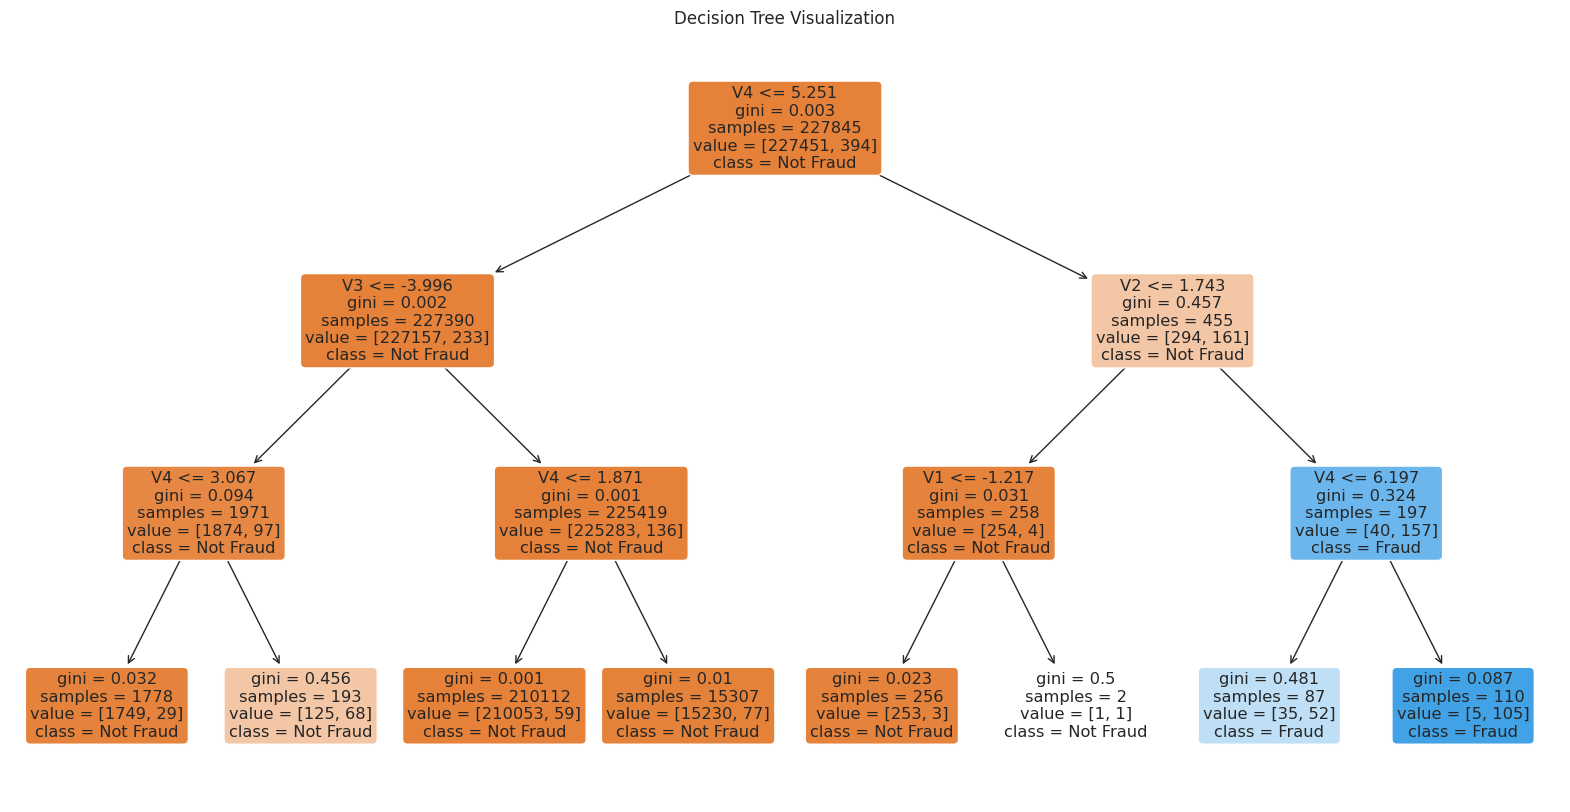

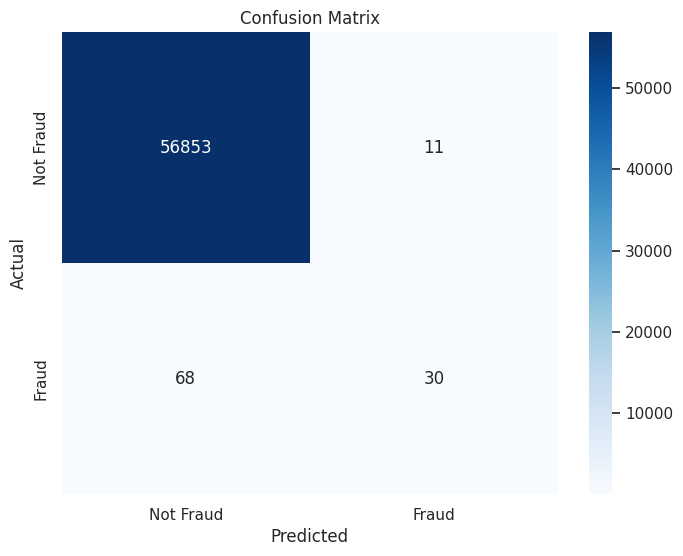

Accuracy: 1.00


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

X_simplified = X[['V1', 'V2', 'V3', 'V4', 'V5']]
X_train_simplified, X_test_simplified, y_train, y_test = train_test_split(X_simplified, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train_simplified, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X_simplified.columns, class_names=["Not Fraud", "Fraud"], rounded=True, proportion=False)
plt.title("Decision Tree Visualization")
plt.show()

y_pred = dt_model.predict(X_test_simplified)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


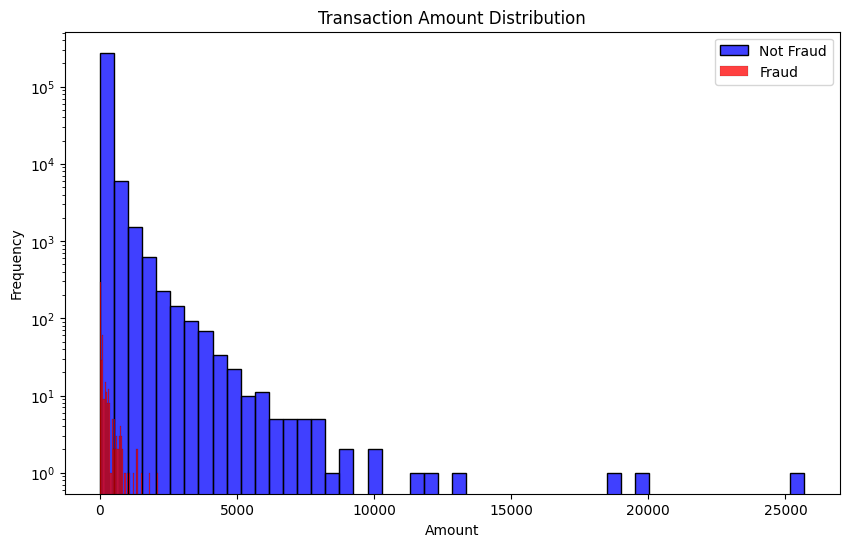

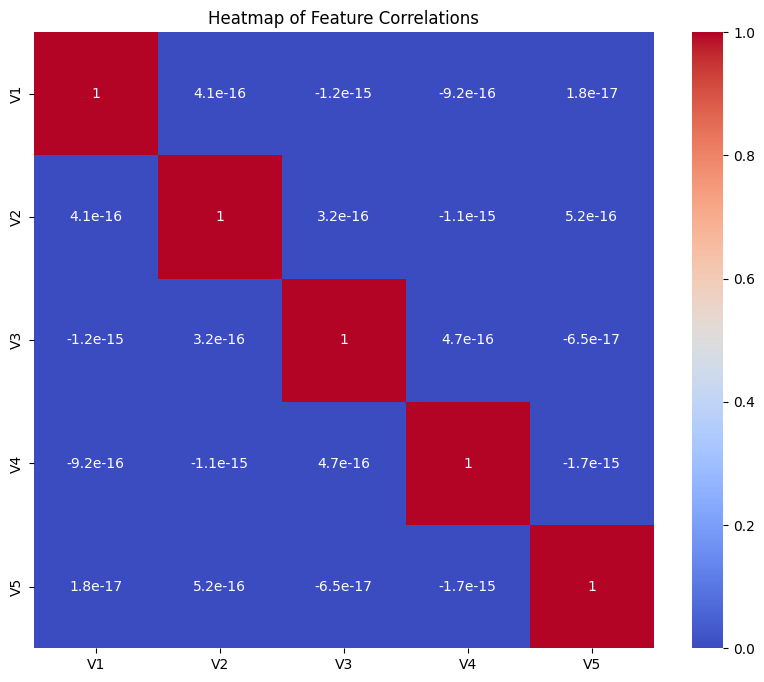

In [ ]:
# Histogram of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='blue', label='Not Fraud')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log') # Using logarithmic scale due to wide range of transaction amounts
plt.legend()
plt.show()

# Heatmap of Feature Correlations
correlation_matrix = X_simplified.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()


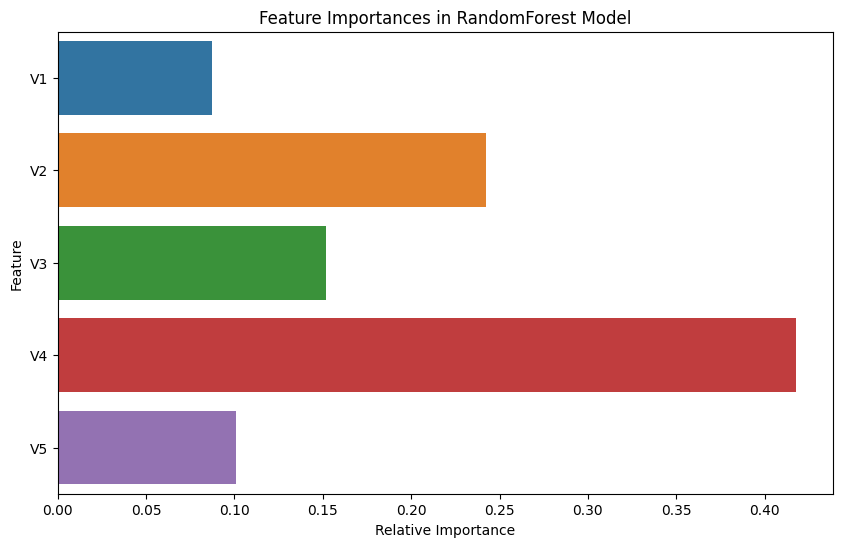

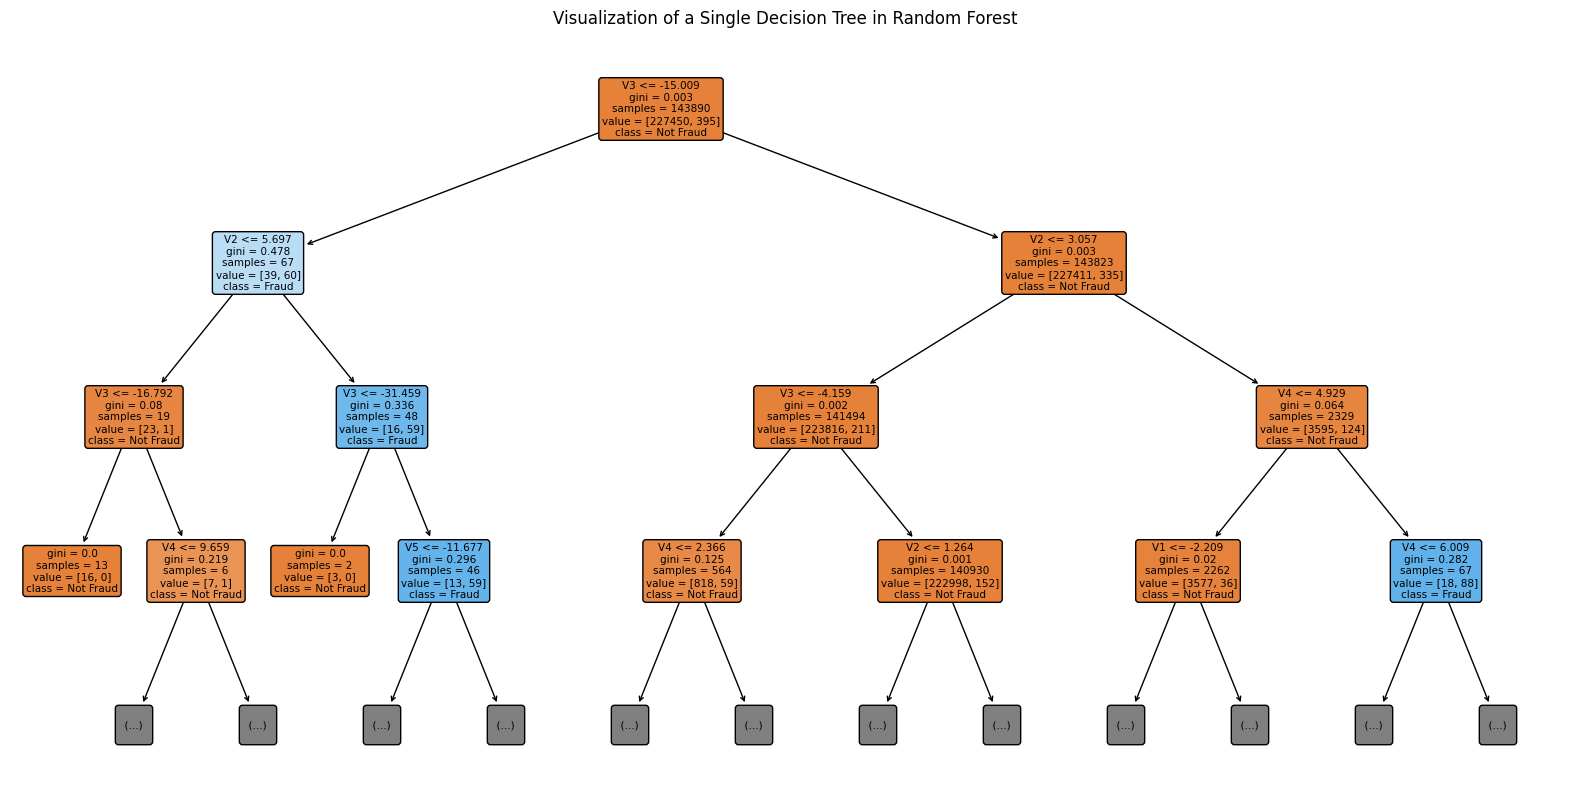

,Feature,Importance
0,V4,0.417612
1,V2,0.242298
2,V3,0.151566
3,V5,0.100925
4,V1,0.087598


In [ ]:
# Since the full model training was previously interrupted, I will create a new, simplified RandomForest model.
# This model will be used to calculate and plot the feature importances.

# Creating a simplified RandomForest model
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train_simplified, y_train)

# Getting feature importances
feature_importances = rf_model.feature_importances_

# Creating a plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X_train_simplified.columns)
plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


# Listing the most important features in the RandomForest model
feature_importance_df = pd.DataFrame({
    'Feature': X_train_simplified.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Visualizing a single decision tree from the RandomForest
# Extracting one tree from the forest
single_tree = rf_model.estimators_[0]

# Visualizing the tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=X_train_simplified.columns, class_names=["Not Fraud", "Fraud"], rounded=True, proportion=False, max_depth=3)
plt.title("Visualization of a Single Decision Tree in Random Forest")
plt.show()

feature_importance_df


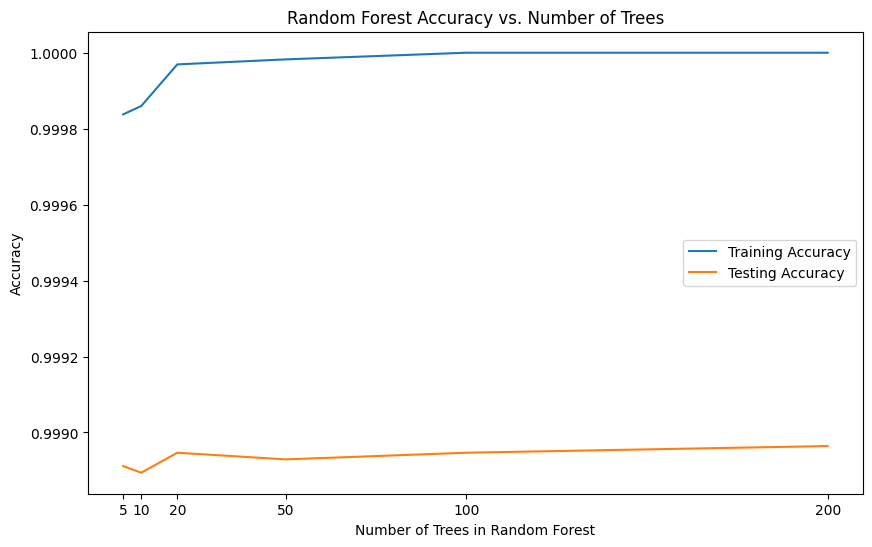

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Defining a range of tree counts for the Random Forest
tree_counts = [5, 10, 20, 50, 100, 200]

# Lists to store accuracies for each tree count
train_accuracies = []
test_accuracies = []

for count in tree_counts:
    # Training the RandomForest model with the current tree count
    model = RandomForestClassifier(n_estimators=count, random_state=42)
    model.fit(X_train_simplified, y_train)

    # Predicting and calculating accuracy on both training and testing sets
    train_pred = model.predict(X_train_simplified)
    test_pred = model.predict(X_test_simplified)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(tree_counts, train_accuracies, label='Training Accuracy')
plt.plot(tree_counts, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.legend()
plt.xticks(tree_counts)
plt.show()
